> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Relationship Between CO2 Emission and GDP

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

CO2 emission of a country is thought to be linked closely to gross domestic product or GDP  according to various sources. What is unknown however, is how exactly the correlation between the two develops over time. This exercise aims to 

1. determine the development of CO2 emissions per person and CO2 per GDP over time
2. find possible differences between the correlation of CO2 emission and GDP for either highly developed or less developed countries
3. Determine, if there is a strong correlation with some other indictor clearly not linked to the CO2 emission in order to demonstrate the difference between correlation and causality

**Note:** Countries will be counted as highly developed, when their HDI is above or equal to 0.8 (very high HDI acc. to UN). Below an HDI of 0.8, but above 0.5, countries are counted as medium for the purpose of this exercise (high/medium HDI acc. to UN) and below 0.5, countries are considered having a low HDI.

**Source:** <a href="https://en.wikipedia.org/wiki/Human_Development_Index">Wikipedia</a>

In [64]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [65]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

path = './data/'
co2_per_person = pd.read_csv(path + 'indicator CDIAC carbon_dioxide_emissions_per_capita.csv')
co2_per_usd = pd.read_csv(path + 'co2 kg per USD.csv')
gdp_per_person = pd.read_csv(path + 'GDPpercapitaconstant2000US.csv')
hdi = pd.read_csv(path + 'Indicator_HDI.csv')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

The datasets used in this project have been taken from <a href="http://gapminder.org">Gapminder</a>, a project page that aims at reducing ignorance in the world. All datasets were provided as excel sheets and saved as .csv files before loading them into this project.

Subsequent data cleaning steps include dropping of NaNs, resetting of the indices as needed and reorganising the datasets, so they can be used for further analysis and visualization.

In [66]:
# clean dependant variable data set containing CO2 emissions per capita for a number of countries worldwide 
# for the years 1751 through 2012

co2_per_person = co2_per_person.set_index('CO2 per capita')
co2_per_person = co2_per_person.dropna(axis=1, how='all')
co2_per_person = co2_per_person.dropna(axis=0, how='all')
co2_per_person.head()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
CO2 per capita,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.414281,7.499690,7.390955,6.839940,6.622435,6.527241,6.178520,6.092100,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.587810,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN


In [67]:
# retrieval of some statistical values about the data set in order to get a feeling for the distribution of the data
co2_per_person.describe()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,200.000000,200.000000,200.000000,200.000000,201.000000,201.000000,201.000000,201.000000,65.000000,65.000000
mean,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,5.160597,5.266567,5.242741,5.250673,5.387444,5.293425,5.064836,5.189779,8.395975,8.391032
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.892710,7.222377,7.198735,6.950140,7.281876,6.858804,6.479270,6.538857,7.796528,8.041490
min,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.022704,0.027472,0.021237,0.025019,0.003482,0.008618,0.011942,0.008443,0.401268,0.426003
25%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,0.610230,0.682390,0.730938,0.681245,0.645242,0.613104,0.609647,0.640119,4.196912,4.141014
50%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,3.216404,3.242589,3.302545,3.301199,3.164370,3.277726,3.106366,3.263605,6.722385,6.506759
75%,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,7.514300,7.530032,7.296806,7.463160,7.555909,7.293089,6.782996,6.983513,9.513115,9.194220
max,1.131253,1.105193,1.244749,1.239133,1.233543,1.227977,1.363424,1.357226,1.351055,1.344913,...,55.322622,62.069377,63.187436,57.986895,57.066817,48.702062,41.378843,40.098333,41.220928,46.643197


In [68]:
# clean independant variable data set containing GDP per capita for a number of countries worldwide 
# for the years 1751 through 2012

gdp_per_person = gdp_per_person.set_index('Income per person (fixed 2000 US$)')
gdp_per_person = gdp_per_person.dropna(axis=1, how='all')
gdp_per_person = gdp_per_person.dropna(axis=0, how='all')
gdp_per_person.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Income per person (fixed 2000 US$),,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19430.054781,19834.632624,20254.346287,20737.945117,21595.395482,21495.805083,21943.339898,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,329.565594,328.777995,353.231466,404.270302,473.136344,562.987685,622.566879,619.818580,623.245275,629.955306
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9753.308311,10241.684839,10599.284668,11102.932157,12452.282038,13495.127466,13352.168544,11645.634909,10614.794315,9977.957073


In [69]:
gdp_per_person.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,96.000000,97.000000,97.000000,97.000000,97.000000,103.000000,105.000000,106.000000,107.000000,107.000000,...,195.000000,195.000000,194.000000,194.000000,193.000000,193.000000,191.000000,189.000000,182.000000,175.000000
mean,2862.692195,2936.271369,3033.697747,3127.397267,3297.171464,3479.098233,3561.800465,3643.836068,3827.447920,4014.630287,...,7983.084448,8113.092660,8335.349531,8545.104221,8898.582041,9219.106697,8999.106190,8463.079022,7699.995854,7603.241430
std,3966.169477,4078.453837,4209.541510,4322.069499,4603.806933,4686.086119,4885.065723,5088.097077,5226.637333,5462.190047,...,12730.751887,12804.769377,13171.168298,13440.153560,14003.742573,14664.833399,14702.224566,14079.334478,11280.297479,10906.851828
min,98.634845,77.662309,72.324927,77.867365,88.130052,100.137524,107.805084,99.080123,92.569121,105.288508,...,83.081859,85.282625,88.243053,92.367256,94.769735,97.910183,101.103851,101.169007,105.531738,109.809298
25%,348.092860,367.165347,347.301046,362.828560,371.591692,391.167669,420.366839,409.926541,427.755618,443.355777,...,606.407609,605.896769,629.447328,628.411890,640.762816,673.004691,686.624839,705.007574,676.924076,650.652354
50%,962.840433,963.113762,976.188701,1045.780232,1064.991250,1091.500026,1111.158861,1150.518306,1238.791051,1261.364518,...,2040.248192,2129.193396,2206.522493,2284.186698,2404.736431,2494.352654,2510.278480,2527.938377,2459.478865,2522.824763
75%,3475.484109,3744.356202,3961.399895,4071.375675,4238.361138,5029.630414,5114.437182,5257.801228,5612.126561,6066.936702,...,9537.855880,9415.266271,9414.557553,9655.998281,10264.674284,10714.744222,10447.748978,9294.355996,9019.537452,9077.125442
max,19588.612697,20009.625798,20410.612688,20153.284926,21842.810221,22334.443485,25091.732053,27876.079659,27925.907805,28350.643198,...,77348.898742,78229.939808,80255.753889,81827.956121,85942.671127,98397.089855,108111.212788,105147.437697,63036.360611,52056.017811


In [70]:
# clean independant variable data set containing CO2 emissions per US dollar for a number of countries worldwide 
# for the years 19080 through 2008

co2_per_usd = co2_per_usd.set_index('CO2 emissions (kg per 2005 PPP $ of GDP)')
co2_per_usd = co2_per_usd.dropna(axis=1, how='all')
co2_per_usd = co2_per_usd.dropna(axis=0, how='all')
co2_per_usd.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
CO2 emissions (kg per 2005 PPP $ of GDP),,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.023013,0.032661,0.036039,0.031306,0.028009,0.025867,0.028480
Albania,0.456299,0.612678,0.592455,0.611854,0.635389,0.628661,0.608406,0.566623,0.565725,0.631581,...,0.217770,0.205441,0.204786,0.231092,0.250046,0.220374,0.240065,0.210233,0.210219,0.181932
Algeria,0.556157,0.376959,0.299592,0.380911,0.487366,0.481102,0.502168,0.557710,0.562190,0.513468,...,0.507006,0.473540,0.442446,0.455473,0.433950,0.398949,0.454387,0.446210,0.455169,0.438833
Angola,NaN,NaN,NaN,NaN,NaN,0.162064,0.156297,0.180754,0.150987,0.146838,...,0.257120,0.260098,0.257214,0.292379,0.202552,0.377698,0.319197,0.312923,0.288086,0.245290
Antigua and Barbuda,0.277777,0.198448,0.546529,0.150105,0.237852,0.374431,0.332179,0.338411,0.333847,0.315626,...,0.278761,0.271802,0.265921,0.273173,0.278372,0.272346,0.263754,0.241156,0.223571,0.227551


In [71]:
# retrieval of some statistical values about the data set in order to get a feeling for the distribution of the data

co2_per_usd.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,125.000000,131.000000,134.000000,134.000000,136.000000,138.000000,139.000000,139.000000,141.000000,141.000000,...,178.000000,179.000000,180.000000,182.000000,182.000000,182.000000,183.000000,182.000000,182.000000,181.000000
mean,0.419742,0.398515,0.388517,0.377156,0.374325,0.380152,0.371333,0.381641,0.378247,0.376797,...,0.441921,0.433802,0.430690,0.418866,0.423755,0.410333,0.397000,0.383620,0.375209,0.365377
std,0.357430,0.356276,0.354393,0.337743,0.329544,0.345942,0.340728,0.342962,0.335572,0.320662,...,0.461937,0.430442,0.403697,0.385647,0.374680,0.336568,0.311035,0.301226,0.290810,0.290356
min,0.048953,0.049240,0.046299,0.053241,0.058127,0.039637,0.043010,0.046655,0.013467,0.019972,...,0.019439,0.028526,0.025015,0.022567,0.032661,0.032961,0.029728,0.028009,0.025867,0.028480
25%,0.207107,0.180631,0.173411,0.179897,0.176583,0.172355,0.162886,0.173170,0.177437,0.174540,...,0.207918,0.195311,0.203662,0.209830,0.200615,0.205715,0.204985,0.195975,0.194639,0.185914
50%,0.327233,0.312753,0.308609,0.302805,0.301648,0.297613,0.270961,0.280828,0.283615,0.282836,...,0.329078,0.315250,0.319646,0.305440,0.319544,0.313934,0.310614,0.303108,0.287896,0.272364
75%,0.548312,0.511583,0.483108,0.444327,0.446578,0.447502,0.457659,0.462546,0.449401,0.451967,...,0.486066,0.491086,0.481336,0.502197,0.516054,0.502650,0.472903,0.461853,0.456883,0.454258
max,2.853803,2.683729,2.678090,2.547464,2.407504,2.298382,2.222499,2.126956,2.190688,2.000928,...,3.983598,3.409914,3.151938,2.910624,2.700169,2.437428,2.093217,2.053087,1.883012,1.862718


In [72]:
# clean the hdi data set; this will be used in order to differentiate between the correlation of CO2 emission 
# and the independant variables in more developed countries and in less developed countries

hdi = hdi.set_index('HDI')
hdi = hdi.dropna(axis=1, how='all')
hdi = hdi.dropna(axis=0, how='all')
hdi_2011 = hdi['2011']
hdi_2011.head()

HDI
Afghanistan    0.398
Albania        0.739
Algeria        0.698
Andorra        0.838
Angola         0.486
Name: 2011, dtype: float64

In [73]:
# determine countries with a high hdi as defined above in 2011

hdi_high = hdi['2011'][hdi['2011']>=0.8]
hdi_high = hdi_high.rename('HDI')
hdi_high.head()

HDI
Andorra      0.838
Australia    0.929
Austria      0.885
Bahrain      0.806
Belgium      0.886
Name: HDI, dtype: float64

In [74]:
# determine countries with a medium hdi as defined above in 2011

hdi_medium = hdi['2011'][(hdi['2011']<0.8)&(hdi['2011']>0.5)]
hdi_medium = hdi_medium.rename('HDI')
hdi_medium.head()

HDI
Albania                0.739
Algeria                0.698
Antigua and Barbuda    0.764
Argentina              0.797
Armenia                0.716
Name: HDI, dtype: float64

In [75]:
# determine countries with a low hdi as defined above in 2011

hdi_low = hdi['2011'][hdi['2011']<=0.5]
hdi_low = hdi_low.rename('HDI')
hdi_low.head()

HDI
Afghanistan     0.398
Angola          0.486
Bangladesh      0.500
Benin           0.427
Burkina Faso    0.331
Name: HDI, dtype: float64

In [76]:
# create data sets for high HDI
co2_per_person_hdi_high = co2_per_person.join(hdi_high,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_high = gdp_per_person.join(hdi_high,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_usd_hdi_high = co2_per_usd.join(hdi_high,how='inner',lsuffix='_co2_usd',rsuffix='_hdi')
gdp_per_person_hdi_high.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,HDI
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19834.632624,20254.346287,20737.945117,21595.395482,21495.805083,21943.339898,NaN,NaN,NaN,0.838
Australia,9407.685082,9451.546304,9351.023272,9749.128563,10231.144465,10633.094400,10635.677912,11165.706459,11533.028316,12091.755332,...,22825.571022,23498.261991,23929.164397,24295.081380,24765.548902,25190.720626,25007.697756,25190.839860,25306.824938,0.929
Austria,7434.183717,7802.972546,7960.707270,8237.060529,8683.454516,8927.460698,9365.306134,9575.183558,9951.607180,10539.697000,...,24466.706298,24945.047766,25370.465866,26171.690912,27036.487332,27305.923295,26183.997598,26642.993858,27266.403350,0.885
Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14536.888265,14788.890079,14775.633256,14082.914600,13373.219940,12505.212545,11600.707375,11236.404979,NaN,0.806
Belgium,7454.716536,7799.889081,8173.818456,8465.979625,8969.632551,9205.035593,9431.614088,9742.062810,10110.804209,10750.644578,...,23097.212617,23750.459812,24033.783302,24512.413136,25034.666923,25082.374127,24190.594952,24550.396553,24733.626956,0.886


In [77]:
# create data sets for medium HDI
co2_per_person_hdi_medium = co2_per_person.join(hdi_medium,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_medium = gdp_per_person.join(hdi_medium,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_usd_hdi_medium = co2_per_usd.join(hdi_medium,how='inner',lsuffix='_co2_usd',rsuffix='_hdi')
co2_per_person_hdi_medium.head()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,HDI
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN,0.739
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654,0.698
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.913204,4.893783,5.006749,5.162817,5.275415,5.679445,5.786646,NaN,NaN,0.764
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.072844,4.160611,4.464492,4.582394,4.785170,4.483564,4.466338,4.676320,4.774982,0.797
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.190052,1.421961,1.427326,1.648352,1.804106,1.410815,1.364888,NaN,NaN,0.716


In [78]:
# create data sets for high low
co2_per_person_hdi_low = co2_per_person.join(hdi_low,how='inner',lsuffix='_co2_pp',rsuffix='_hdi')
gdp_per_person_hdi_low = gdp_per_person.join(hdi_low,how='inner',lsuffix='_gdp_pp',rsuffix='_hdi')
co2_per_usd_hdi_low = co2_per_usd.join(hdi_low,how='inner',lsuffix='_co2_usd',rsuffix='_hdi')
co2_per_person_hdi_low.head()

,1751,1755,1762,1763,1764,1765,1766,1767,1768,1769,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,HDI
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN,0.398
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.177610,1.161662,1.308849,1.435044,1.474353,1.500054,1.593918,NaN,NaN,0.486
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.286703,0.267095,0.338118,0.336645,0.319161,0.355868,0.377610,0.401268,0.426003,0.500
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.339507,0.314131,0.492354,0.554571,0.537539,0.552871,0.586260,NaN,NaN,0.427
Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.080035,0.079281,0.093032,0.109310,0.109419,0.104143,0.102194,NaN,NaN,0.331


In [84]:
# take the mean of all years available for each country
co2_per_person_country = co2_per_person.iloc[:,:-1].mean(axis=1)
gdp_per_person_country = gdp_per_person.iloc[:,:-1].mean(axis=1)
co2_per_person_hdi_high_country = co2_per_person_hdi_high.iloc[:,:-1].mean(axis=1)
gdp_per_person_hdi_high_country = gdp_per_person_hdi_high.iloc[:,:-1].mean(axis=1)
co2_per_person_hdi_medium_country = co2_per_person_hdi_medium.iloc[:,:-1].mean(axis=1)
gdp_per_person_hdi_medium_country = gdp_per_person_hdi_medium.iloc[:,:-1].mean(axis=1)
co2_per_person_hdi_low_country = co2_per_person_hdi_low.iloc[:,:-1].mean(axis=1)
gdp_per_person_hdi_low_country = gdp_per_person_hdi_low.iloc[:,:-1].mean(axis=1)

In [80]:
# transpose and limit to years 1960-2011, where a significant number of values is available
# take the mean across all countrys in that hdi range for each year
co2_per_person_hdi_high_time = co2_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_high_time = gdp_per_person_hdi_high.transpose().mean(axis=1)['1960':'2010']
co2_per_person_hdi_medium_time = co2_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_medium_time = gdp_per_person_hdi_medium.transpose().mean(axis=1)['1960':'2010']
co2_per_person_hdi_low_time = co2_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']
gdp_per_person_hdi_low_time = gdp_per_person_hdi_low.transpose().mean(axis=1)['1960':'2010']

In [85]:
co2_per_person_country.head()

CO2 per capita
Afghanistan    0.102106
Albania        1.218712
Algeria        1.312873
Andorra        7.106571
Angola         0.551680
dtype: float64

In [83]:
hdi_2011.head()

HDI
Afghanistan    0.398
Albania        0.739
Algeria        0.698
Andorra        0.838
Angola         0.486
Name: 2011, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Development of CO2 emission and GDP over time for highly developed and less developed countries

In [127]:
int(min(co2_per_person_hdi_high_time.index))

1960

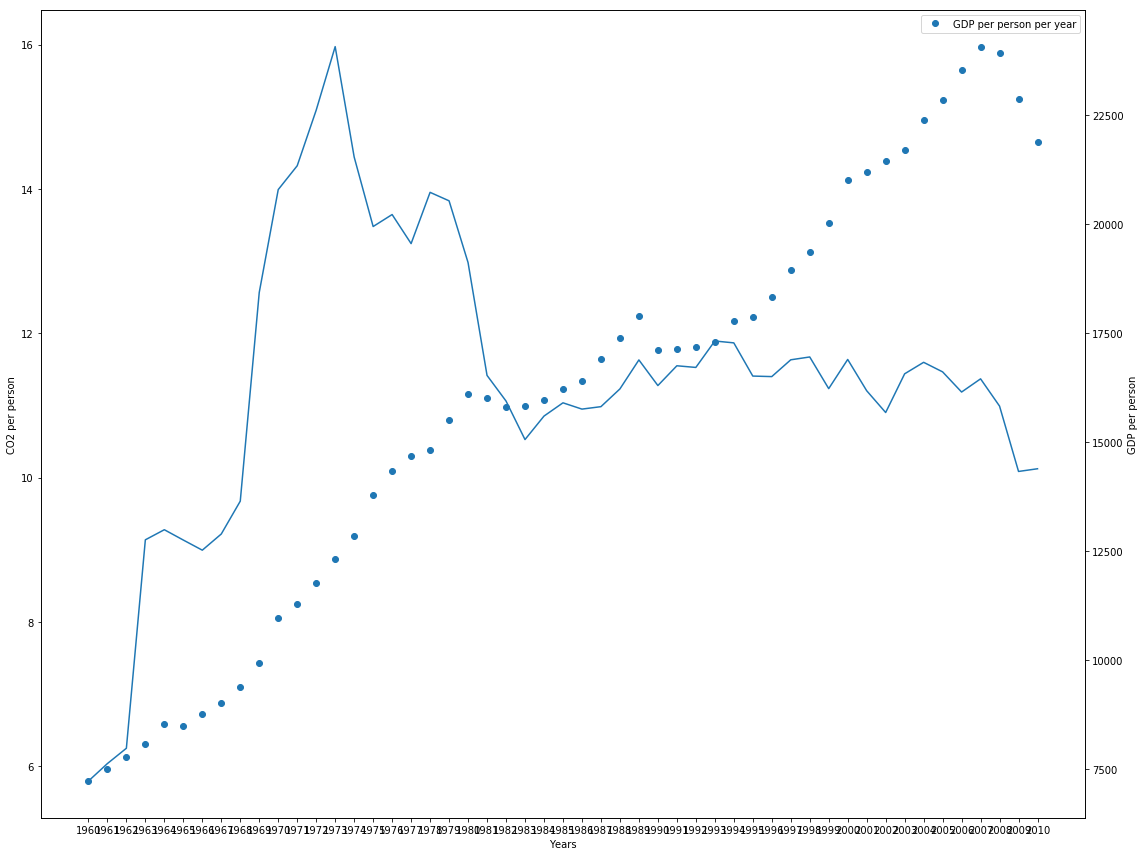

In [145]:
#pylab.rcParams['figure.figsize'] = 16, 12
fig, ax1 = plt.subplots()
ax1.plot(co2_per_person_hdi_high_time)
ax1.set_xlabel('Years')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('CO2 per person')
ax1.tick_params('y')
#ax1.legend(['CO2 per person per year'])

ax2 = ax1.twinx()
ax2.plot(gdp_per_person_hdi_high_time, 'o')
ax2.set_ylabel('GDP per person')
ax2.tick_params('y')
ax2.legend(['GDP per person per year'])

fig.tight_layout()

plt.show()

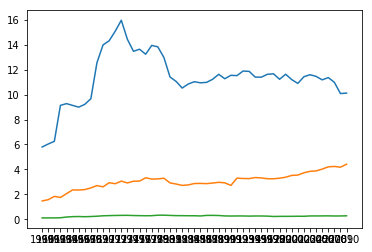

In [36]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

# plot mean of CO2 emissions versus time for countries with very high HDI
plt.plot(co2_per_person_hdi_high_time)
plt.plot(co2_per_person_hdi_medium_time)
plt.plot(co2_per_person_hdi_low_time)

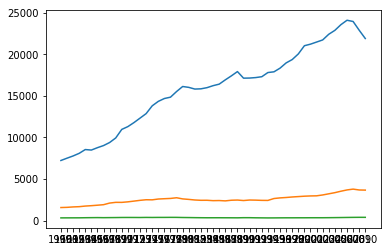

In [37]:
plt.plot(gdp_per_person_hdi_high_time)
plt.plot(gdp_per_person_hdi_medium_time)
plt.plot(gdp_per_person_hdi_low_time)

### Correlation between CO2 Emission and GDP for Highly Developed and Less Developed Countries

each dot is a year

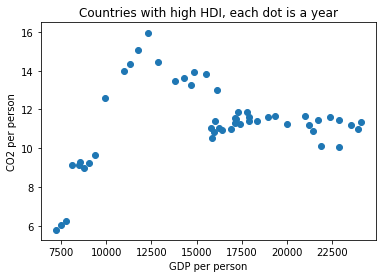

In [113]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

plt.scatter(gdp_per_person_hdi_high_time, co2_per_person_hdi_high_time)
plt.ylabel('CO2 per person')
plt.xlabel('GDP per person')
plt.title('Countries with high HDI, each dot is a year')
plt.show()

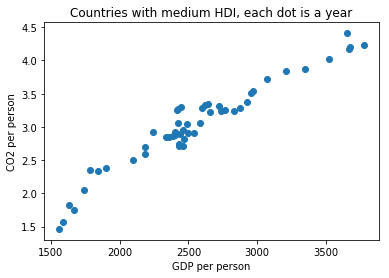

In [114]:
plt.scatter(gdp_per_person_hdi_medium_time, co2_per_person_hdi_medium_time)
plt.ylabel('CO2 per person')
plt.xlabel('GDP per person')
plt.title('Countries with medium HDI, each dot is a year')
plt.show()

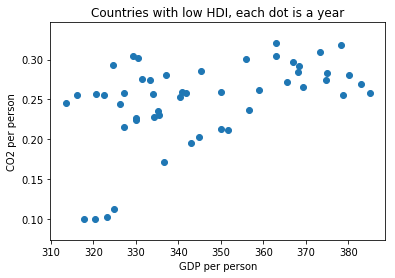

In [116]:
plt.scatter(gdp_per_person_hdi_low_time, co2_per_person_hdi_low_time)
plt.ylabel('CO2 per person')
plt.xlabel('GDP per person')
plt.title('Countries with low HDI, each dot is a year')
plt.show()

each dot is a country

In [21]:
corr_hdi_high = pd.DataFrame(co2_per_person_hdi_high_country).join(pd.DataFrame(gdp_per_person_hdi_high_country),how='inner',lsuffix='_co2', rsuffix='_gdp')

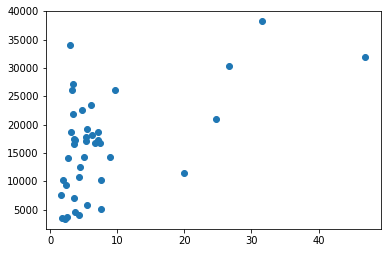

In [22]:
plt.scatter(corr_hdi_high.iloc[:,0],corr_hdi_high.iloc[:,1])

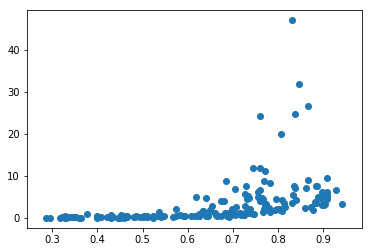

In [101]:
# inner join in order to drop countries, where one of the parameters is not available
corr_hdi_2011 = pd.DataFrame(hdi_2011).join(pd.DataFrame(co2_per_person_country),how='inner',lsuffix='_co2', rsuffix='_gdp')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(corr_hdi_2011.iloc[:,0], corr_hdi_2011.iloc[:,1])
plt.show()

In [23]:
corr_hdi_low = pd.DataFrame(co2_per_person_hdi_low_country).join(pd.DataFrame(gdp_per_person_hdi_low_country),how='inner',lsuffix='_co2', rsuffix='_gdp')

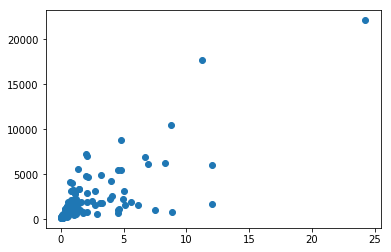

In [24]:
plt.scatter(corr_hdi_low.iloc[:,0],corr_hdi_low.iloc[:,1])

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!